# Imports:

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns

import matplotlib.pyplot as plt
import math
import explore
import prepare


from scipy import stats
import explore
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import decimal as d

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

-----


# Pre-Planning:

- 1.) Initial run through of the DS pipeline. Will provide a basic MVP.
- 2.) Start by acquire dataset utilizing pandas read_csv.
- 3.) Prep work will be basic dropping of nulls and not worrying about outliers, will see if any datatypes need to be changed.
- 4.) Investigate any missing values also.
- 5.) Explore the dataset on unscaled data, the target variable will be radiation, will utilize univariate, bivariate and multivar.
- 6.) Will utilize feature engineering to see which features will be useful in prediciton radiation level.
- 6.) Target is continous so this will be a regression model.
- 7.) Will utilize 4 models and compare the performance, 
- 8.) Will evaluate on unscaled train, validate datasets.
- 9.) Will evluate test on best performing model
- 10.) Present findings and give a conclusion.
- 11.) If time permits will go back and deal with outliers and scaling.


-------

# Executive Summary

-----

# Acquire:

In [2]:
#uitlizing pandas read csv to create dataframe
df = pd.read_csv('SolarPrediction.csv')

In [3]:
#32686 records x 11 fields
df.shape

(32686, 11)

In [4]:
#datatypes are int, float, and object.
# Right away can see time and dates which will possibly need to be changed to different data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
#brief look at the data.
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
5,1475227824,9/29/2016 12:00:00 AM,23:30:24,1.21,48,30.46,64,120.20,5.62,06:13:00,18:13:00
6,1475227519,9/29/2016 12:00:00 AM,23:25:19,1.20,49,30.46,72,112.45,6.75,06:13:00,18:13:00
7,1475227222,9/29/2016 12:00:00 AM,23:20:22,1.24,49,30.46,71,122.97,5.62,06:13:00,18:13:00
8,1475226922,9/29/2016 12:00:00 AM,23:15:22,1.23,49,30.46,80,101.18,4.50,06:13:00,18:13:00
9,1475226622,9/29/2016 12:00:00 AM,23:10:22,1.21,49,30.46,85,141.87,4.50,06:13:00,18:13:00


In [6]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


### Main Takeaways:

# Prepare:

In [7]:
explore.miss_dup_values(df)

Your selected dataframe has 11 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [9]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [10]:
# will not utilize UNIXTime
df.drop(columns = 'UNIXTime', inplace = True)

In [11]:
# Data Needs to be renamed to Date
df.rename(columns = {'Data':'Date'}, inplace = True)

In [12]:
#added in column in datetime format, will convert these new columns to a hour and min then change to string and combine them.
df['Date'] = pd.to_datetime(df.Date)
df['Timehr'] = pd.to_datetime(df.Time).dt.hour
df['Timehr'] = df.Timehr.astype(str)
#######
df['Timemin'] = pd.to_datetime(df.Time).dt.minute
df['Timemin'] = df.Timemin.astype(str)
#######
df['Timesunhr'] = pd.to_datetime(df.TimeSunRise).dt.hour
df['Timesunmin'] = pd.to_datetime(df.TimeSunRise).dt.minute
df['Timesunhr'] = df.Timesunhr.astype(str)
df['Timesunmin'] = df.Timesunmin.astype(str)
#####
df['Timesethr'] = pd.to_datetime(df.TimeSunSet).dt.hour
df['Timesetmin'] = pd.to_datetime(df.TimeSunSet).dt.minute
df['Timesethr'] = df.Timesethr.astype(str)
df['Timesetmin'] = df.Timesetmin.astype(str)


In [13]:
#combining 
df['Time'] = (df.Timehr + '.' + df.Timemin)
df['TimeSunRise'] = (df.Timesunhr + '.' + df.Timesunmin)
df['TimeSunSet'] = (df.Timesethr + '.' + df.Timesetmin)

In [14]:
df.columns

Index(['Date', 'Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet',
       'Timehr', 'Timemin', 'Timesunhr', 'Timesunmin', 'Timesethr',
       'Timesetmin'],
      dtype='object')

In [15]:
#dropping several columns
df.drop(columns = {'Timehr', 'Timemin', 'Timesunhr', 'Timesunmin', 'Timesethr',
       'Timesetmin'}, inplace = True)


In [16]:
cols = ['TimeSunRise', 'TimeSunSet', 'Time']

In [17]:
df[cols] = df[cols].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    32686 non-null  datetime64[ns]
 1   Time                    32686 non-null  float64       
 2   Radiation               32686 non-null  float64       
 3   Temperature             32686 non-null  int64         
 4   Pressure                32686 non-null  float64       
 5   Humidity                32686 non-null  int64         
 6   WindDirection(Degrees)  32686 non-null  float64       
 7   Speed                   32686 non-null  float64       
 8   TimeSunRise             32686 non-null  float64       
 9   TimeSunSet              32686 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 2.5 MB


In [19]:
df.head()

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2016-09-29,23.55,1.21,48,30.46,59,177.39,5.62,6.13,18.13
1,2016-09-29,23.50,1.21,48,30.46,58,176.78,3.37,6.13,18.13
2,2016-09-29,23.45,1.23,48,30.46,57,158.75,3.37,6.13,18.13
3,2016-09-29,23.40,1.21,48,30.46,60,137.71,3.37,6.13,18.13
4,2016-09-29,23.35,1.17,48,30.46,62,104.95,5.62,6.13,18.13


In [20]:
#creating new column which is day, if 0 then night, if 1 is day
df['day'] = np.where((df.Time < df.TimeSunSet) & (df.Time > df.TimeSunRise), 1, 0)
#dropping Sunset and Rise columns
df.drop(columns = ['TimeSunRise', 'TimeSunSet'],inplace = True)


In [21]:
df.head()

,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,day
0,2016-09-29,23.55,1.21,48,30.46,59,177.39,5.62,0
1,2016-09-29,23.50,1.21,48,30.46,58,176.78,3.37,0
2,2016-09-29,23.45,1.23,48,30.46,57,158.75,3.37,0
3,2016-09-29,23.40,1.21,48,30.46,60,137.71,3.37,0
4,2016-09-29,23.35,1.17,48,30.46,62,104.95,5.62,0


In [22]:
#binning degrees to have specificy wind direction
df['wind_direction'] = pd.cut(df['WindDirection(Degrees)'], [0,23,68,113,158,203,248,293,336,360], labels = ['N','NE','E','SE','S','SW','W','NW','N'], ordered = False)
df.drop(columns = 'WindDirection(Degrees)', inplace = True)

In [23]:
df.head()

,Date,Time,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction
0,2016-09-29,23.55,1.21,48,30.46,59,5.62,0,S
1,2016-09-29,23.50,1.21,48,30.46,58,3.37,0,S
2,2016-09-29,23.45,1.23,48,30.46,57,3.37,0,S
3,2016-09-29,23.40,1.21,48,30.46,60,3.37,0,SE
4,2016-09-29,23.35,1.17,48,30.46,62,5.62,0,E


In [31]:
df['time_of_day'] = pd.cut(df['Time'], [-0.01, 06.00, 10.00, 12.00,14.00,16.00,18.00,24.00], labels = ['0.00-06.00', '06.00-10.00','10.00-12.00','12.00-14.00','14.00-16.00','16.00-18.00','18.00--24.00'])


KeyError: 'Time'

In [32]:
df[df.time_of_day.isna()]

,Date,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction,time_of_day


In [33]:
df.head()

,Date,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction,time_of_day
0,2016-09-29,1.21,48,30.46,59,5.62,0,S,18.00--24.00
1,2016-09-29,1.21,48,30.46,58,3.37,0,S,18.00--24.00
2,2016-09-29,1.23,48,30.46,57,3.37,0,S,18.00--24.00
3,2016-09-29,1.21,48,30.46,60,3.37,0,SE,18.00--24.00
4,2016-09-29,1.17,48,30.46,62,5.62,0,E,18.00--24.00


In [34]:
df.drop(columns = {'Time'}, inplace = True)

KeyError: "['Time'] not found in axis"

In [35]:
df.head()

,Date,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction,time_of_day
0,2016-09-29,1.21,48,30.46,59,5.62,0,S,18.00--24.00
1,2016-09-29,1.21,48,30.46,58,3.37,0,S,18.00--24.00
2,2016-09-29,1.23,48,30.46,57,3.37,0,S,18.00--24.00
3,2016-09-29,1.21,48,30.46,60,3.37,0,SE,18.00--24.00
4,2016-09-29,1.17,48,30.46,62,5.62,0,E,18.00--24.00


In [49]:
def create_dummies(df):
    '''
    This function is used to create dummy columns for my non binary columns
    '''
    # create dummies for payment_type, internet_service_type, and contract_type
    time_dummies = pd.get_dummies(df.time_of_day, drop_first=False)
    

    # now we concatenate our dummy dataframes with the original
    df = pd.concat([df, time_dummies], axis=1)
    

    return df

In [65]:
df =create_dummies(df)

In [66]:
train, validate, test = prepare.split_continuous(df)

train -> (18303, 16)
validate -> (7845, 16)
test -> (6538, 16)


## Main Takeaways:

- Did not need to drop any nulls, or values.
- Decided to not deal with outliers and will leave them.
- Converted several columns to different datatypes, mainly dates where changed to datetime, then converted to obj to be combined then float.
- Created a new column called day which states if the record was during the day with 1 being yes and 0 being no.
- Binned wind direction degrees into N,NE,S,SE,SW,W, NW,W.




-------

# Explore:

In [67]:
quant_vars = ['Temperature', 'Pressure', 'Humidity', 'Speed']
cat_vars = ['day', 'wind_direction', 'time_of_day']


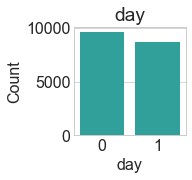

   day  Count  Percent
0    0   9629    52.61
1    1   8674    47.39
_________________________________________________________________


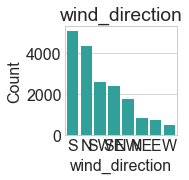

   wind_direction  Count  Percent
S               S   5080    27.76
SE              N   4344    23.73
NE             SW   2609    14.25
E              SE   2410    13.17
N              NW   1779     9.72
NW             NE    854     4.67
SW              E    739     4.04
W               W    488     2.67
_________________________________________________________________


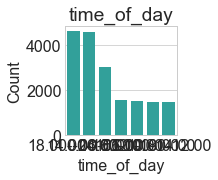

               time_of_day  Count  Percent
18.00--24.00  18.00--24.00   4623    25.26
0.00-06.00     14.00-16.00   4599    25.13
06.00-10.00     0.00-06.00   3057    16.70
14.00-16.00    06.00-10.00   1563     8.54
16.00-18.00    16.00-18.00   1502     8.21
10.00-12.00    12.00-14.00   1485     8.11
12.00-14.00    10.00-12.00   1474     8.05
_________________________________________________________________


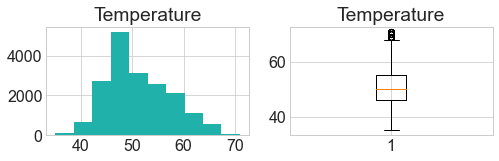

count    18303.000000
mean        51.062012
std          6.166756
min         35.000000
25%         46.000000
50%         50.000000
75%         55.000000
max         71.000000
Name: Temperature, dtype: float64


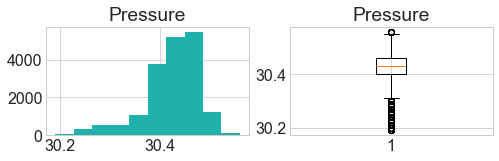

count    18303.000000
mean        30.423053
std          0.054653
min         30.190000
25%         30.400000
50%         30.430000
75%         30.460000
max         30.560000
Name: Pressure, dtype: float64


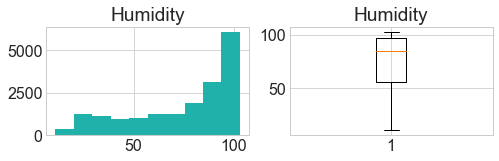

count    18303.000000
mean        74.960116
std         25.955723
min         11.000000
25%         56.000000
50%         85.000000
75%         97.000000
max        103.000000
Name: Humidity, dtype: float64


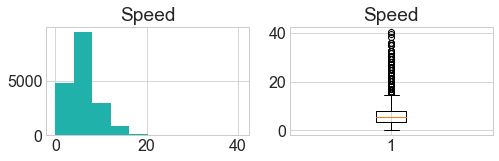

count    18303.000000
mean         6.256079
std          3.477974
min          0.000000
25%          3.370000
50%          5.620000
75%          7.870000
max         40.500000
Name: Speed, dtype: float64


In [68]:
#univariate exploration of each feature including target
explore.explore_univariate(train, cat_vars, quant_vars)

<AxesSubplot:xlabel='wind_direction', ylabel='Radiation'>

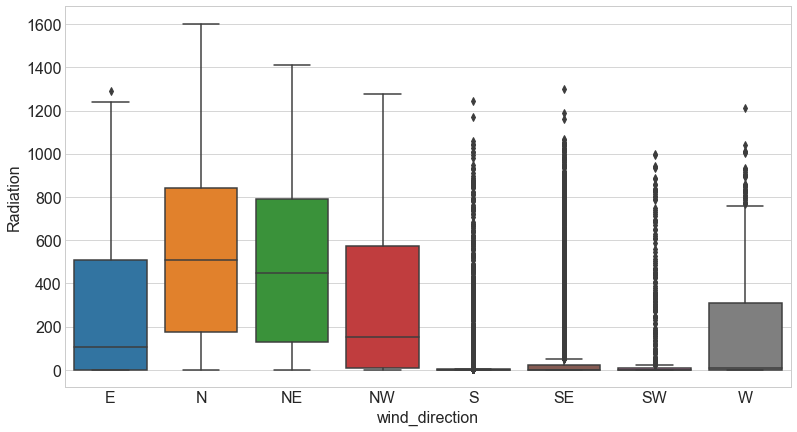

In [69]:
#Looking at the categorical features, appears there is a large amount of outliers in S,SE, SW, W Wind direction
sns.boxplot(x = 'wind_direction', y ='Radiation' ,data = train)

<AxesSubplot:xlabel='time_of_day', ylabel='Radiation'>

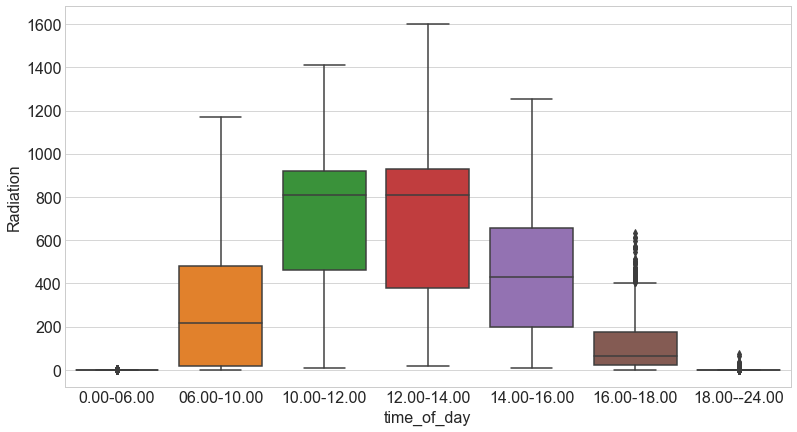

In [70]:
#Higher amount of radiation between 10-14:00 hours.
sns.boxplot(x = 'time_of_day', y ='Radiation' ,data = train)

<AxesSubplot:xlabel='day', ylabel='Radiation'>

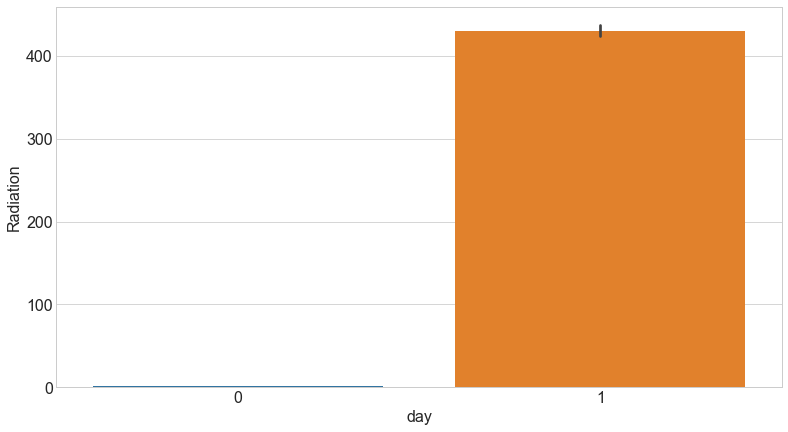

In [71]:
#no information on daytime vs night other than radiation occurs during day.
sns.barplot(x = 'day', y ='Radiation' ,data = train)

<AxesSubplot:xlabel='Radiation', ylabel='Temperature'>

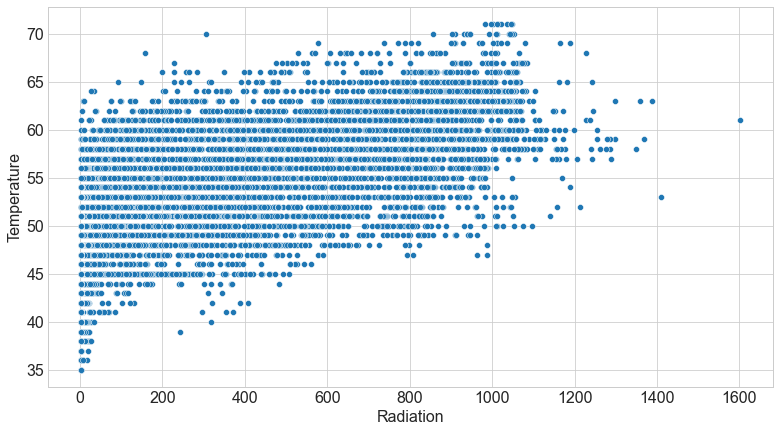

In [72]:
# looking at relationship of continous vs contiunous.
sns.scatterplot(x = "Radiation", y = 'Temperature', data = train)

<AxesSubplot:xlabel='Radiation', ylabel='Speed'>

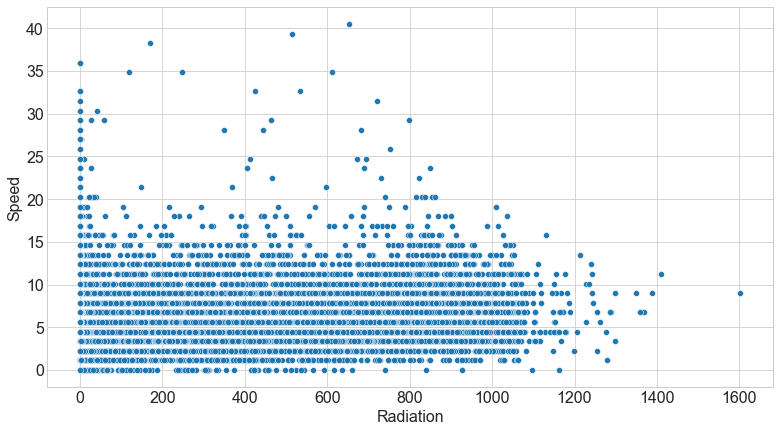

In [73]:
# relationship between continous vs continous
sns.scatterplot(x = "Radiation", y = 'Speed', data = train)

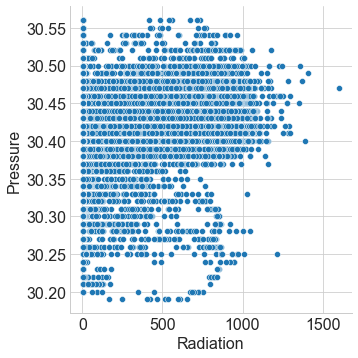

In [74]:
#relationship between continous vs continous
sns.relplot(x = "Radiation", y = 'Pressure', data = train)

<AxesSubplot:xlabel='Radiation', ylabel='Humidity'>

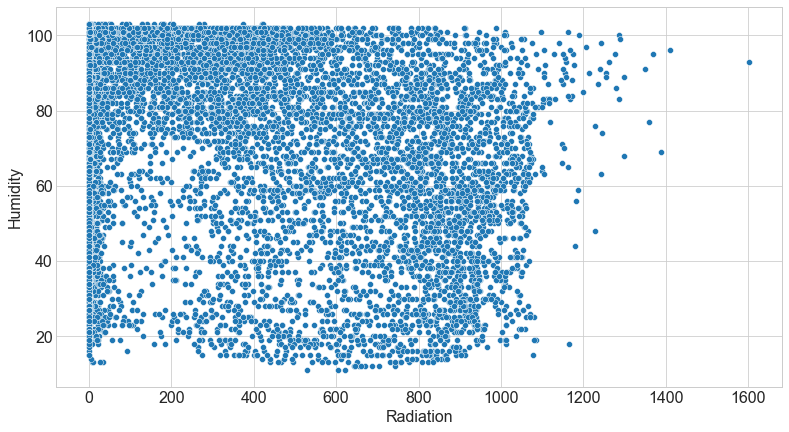

In [75]:
#relationship between continous vs continous
sns.scatterplot(x = "Radiation", y = 'Humidity', data = train)

In [76]:
train.corr()

,Radiation,Temperature,Pressure,Humidity,Speed,day,0.00-06.00,06.00-10.00,10.00-12.00,12.00-14.00,14.00-16.00,16.00-18.00,18.00--24.00
Radiation,1.000000,0.733992,0.106916,-0.217616,0.068353,0.681130,-0.375220,0.099201,0.471150,0.442443,0.222970,-0.080613,-0.376256
Temperature,0.733992,1.000000,0.303011,-0.277171,-0.037935,0.610950,-0.448494,0.002267,0.304793,0.318190,0.271822,0.132640,-0.203664
Pressure,0.106916,0.303011,1.000000,-0.224317,-0.077195,-0.011547,-0.118581,0.099942,0.119314,-0.061681,-0.140730,-0.103245,0.151968
Humidity,-0.217616,-0.277171,-0.224317,1.000000,-0.212833,-0.034696,-0.026797,-0.065031,-0.060672,-0.025932,0.032361,0.069448,0.072262
Speed,0.068353,-0.037935,-0.077195,-0.212833,1.000000,-0.000423,0.049869,-0.030221,0.023807,0.075656,0.032171,-0.060516,-0.068649
day,0.681130,0.610950,-0.011547,-0.034696,-0.000423,1.000000,-0.549828,0.372931,0.313081,0.311817,0.321946,0.250442,-0.528576
0.00-06.00,-0.375220,-0.448494,-0.118581,-0.026797,0.049869,-0.549828,1.000000,-0.259405,-0.172141,-0.171446,-0.177015,-0.173211,-0.336765
06.00-10.00,0.099201,0.002267,0.099942,-0.065031,-0.030221,0.372931,-0.259405,1.000000,-0.133059,-0.132522,-0.136827,-0.133887,-0.260309
10.00-12.00,0.471150,0.304793,0.119314,-0.060672,0.023807,0.313081,-0.172141,-0.133059,1.000000,-0.087942,-0.090798,-0.088847,-0.172741
12.00-14.00,0.442443,0.318190,-0.061681,-0.025932,0.075656,0.311817,-0.171446,-0.132522,-0.087942,1.000000,-0.090432,-0.088489,-0.172044


<AxesSubplot:title={'center':'Feautures  Correlating with Radiation'}>

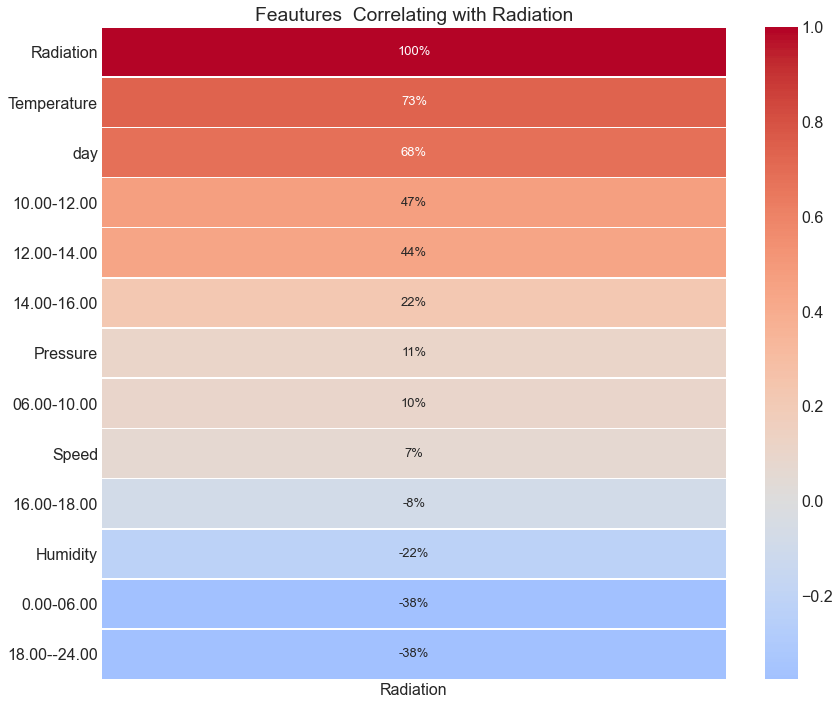

In [77]:
explore.get_heatmap(train, "Radiation")

## Main Takeaways:

- Temperature is the only feature which visually appears normally distributed.
- Can see there is a linear corelation between raditaion vs. temperature and radiation vs.pressure.
- Appears that between 10:00 and 14:00 hours there is a larger radiation levels.
- The heatmap indicates therre is a correlation between the target and humidty, temperature, day.

------

# Statistical Tests:

### Pearson Correlation:

 Pearson correlation coefficient is 0.7339918787048912, the corresponding p value is 0.0.
 We reject the null, and accept HA: there is a relationship between total_squareft and assessment_value


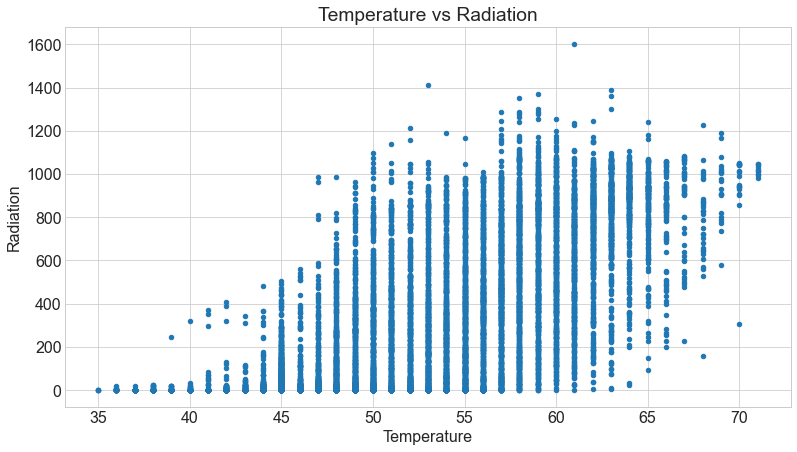

In [79]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between Radiation and Temperature'

alpha = 0.05

corr, p = stats.pearsonr(train.Temperature, train.Radiation)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('Temperature', 'Radiation')
plt.title('Temperature vs Radiation')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a relationship between total_squareft and assessment_value')
else:
    print(f' We accept null,  {Hypothesis_null}.')



 Pearson correlation coefficient is -0.21761642658167, the corresponding p value is 4.3005689237312125e-195.
 We reject the null, and accept HA: there is a relationship


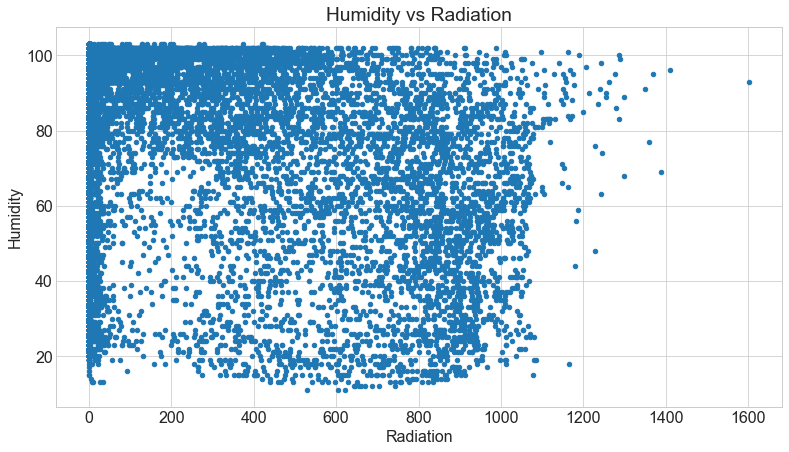

In [80]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between Radiation and Humidity'

alpha = 0.05

corr, p = stats.pearsonr(train.Humidity, train.Radiation)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('Radiation', 'Humidity')
plt.title('Humidity vs Radiation')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a relationship')
else:
    print(f' We accept null,  {Hypothesis_null}.')

 Pearson correlation coefficient is 0.106915687783673, the corresponding p value is 1.1251486078240107e-47.
 We reject the null, and accept HA: there is a relationship


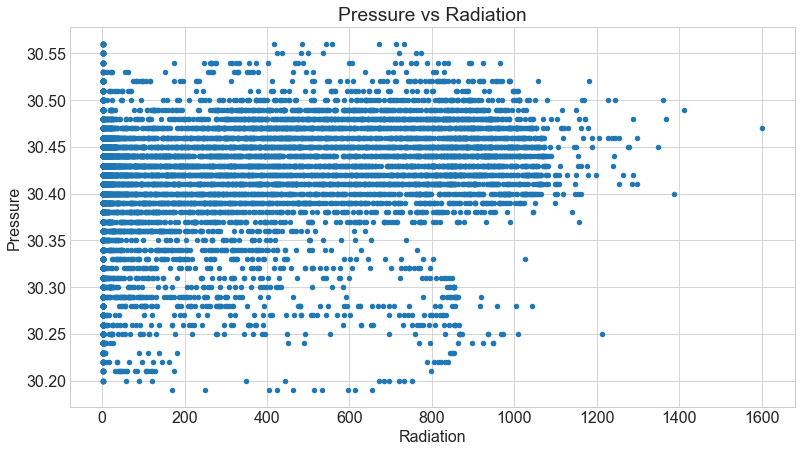

In [81]:
#Pearson Correlation

Hypothesis_null = 'there is no linear correlation between Radiation and Pressure'

alpha = 0.05

corr, p = stats.pearsonr(train.Pressure, train.Radiation)
print(f' Pearson correlation coefficient is {corr}, the corresponding p value is {p}.')


train.plot.scatter('Radiation', 'Pressure')
plt.title('Pressure vs Radiation')

if p < 0.05:
    print(' We reject the null, and accept HA: there is a relationship')
else:
    print(f' We accept null,  {Hypothesis_null}.')

In [82]:
train.head(10)

,Date,Radiation,Temperature,Pressure,Humidity,Speed,day,wind_direction,time_of_day,0.00-06.00,06.00-10.00,10.00-12.00,12.00-14.00,14.00-16.00,16.00-18.00,18.00--24.00
24829,2016-12-30,1.24,44,30.34,101,2.25,0,S,18.00--24.00,0,0,0,0,0,0,1
8685,2016-10-27,810.79,60,30.38,62,11.25,1,N,14.00-16.00,0,0,0,0,1,0,0
28818,2016-12-17,1.20,41,30.25,51,7.87,0,SW,0.00-06.00,1,0,0,0,0,0,0
22613,2016-11-07,520.74,62,30.41,55,4.50,1,N,14.00-16.00,0,0,0,0,1,0,0
19345,2016-11-18,1.24,46,30.44,86,5.62,0,SE,18.00--24.00,0,0,0,0,0,0,1
22538,2016-11-07,1.24,46,30.45,53,2.25,0,S,18.00--24.00,0,0,0,0,0,0,1
29155,2016-12-15,1.29,46,30.27,103,3.37,0,NW,18.00--24.00,0,0,0,0,0,0,1
25788,2016-12-27,768.37,58,30.39,27,12.37,1,NE,14.00-16.00,0,0,0,0,1,0,0
16726,2016-11-28,1.20,45,30.44,28,2.25,0,SE,0.00-06.00,1,0,0,0,0,0,0
16582,2016-11-28,711.07,57,30.41,49,4.50,1,E,14.00-16.00,0,0,0,0,1,0,0


In [95]:
#TTest
# make a subset 
x1 = train[train['10.00-12.00'] == 1].Radiation
x2 = train[train['12.00-14.00'] != 1].Radiation


# run a 1 sample, t-test
t_stat, p = stats.ttest_ind(x1,x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no difference in radiation levels for time 10:00-12:00 and not the time 10:00-12:00'

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 71.3444
p_value = 0.0000

We can reject the null hypothesis that There is no difference in radiation levels for time 10:00-12:00 and not the time 10:00-12:00


In [96]:
#TTest
# make a subset 
x1 = train[train['10.00-12.00'] == 1].Radiation
x2 = train[train['06.00-10.00'] == 1].Radiation


# run a 1 sample, t-test
t_stat, p = stats.ttest_ind(x1, x2)

print(f'\nstatistic = {t_stat:.4f}')
print(f'p_value = {p:.4f}')

# set alpha
alpha = 0.05

null_hypothesis = 'There is no difference in radiation levels for time 10:00-12:00 and 12.00-14.00'

if p < alpha:
    print(f'\nWe can reject the null hypothesis that', null_hypothesis)
else:
    print(f'\nWe fail to reject the null hypothesis.')


statistic = 49.4591
p_value = 0.0000

We can reject the null hypothesis that There is no difference in radiation levels for time 10:00-12:00 and 12.00-14.00
